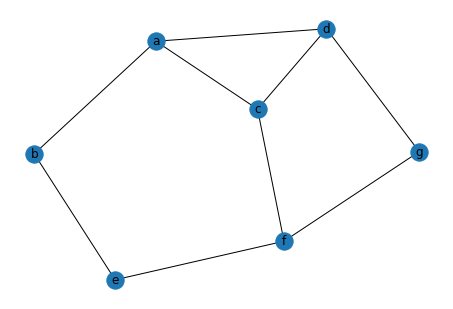

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
# for i in range(5):
#     G.add_node(i)

# for i in range(5):
#     G.add_edge(i, (i+1)%5)
    
# for i in range(5, 8):
#     G.add_node(i)
    
# G.add_edge(5,6)
# G.add_edge(6,7)
# G.add_edge(5,4)
# G.add_edge(2,4)

# G.remove_edge(0,4)

for i in ['a','b','c','d','e','f','g']:
    G.add_node(i)

G.add_edges_from([('a','b'), ('a','c'), ('a','d'), ('c','d'), ('b','e'), ('e','f'), ('f','g'), ('c','f'), ('d','g')])

nx.draw(G, with_labels=True)
plt.show()

In [5]:
for i in range(8):
    print (list(G.neighbors(i)))

[1]
[0, 2]
[1, 3, 4]
[2, 4]
[3, 5, 2]
[6, 4]
[5, 7]
[6]


In [13]:
todolist = ['a']
visited = []

while todolist:
    i = todolist[0]
    for j in list(G.neighbors(i)):
        if (j not in todolist) and (j not in visited): todolist.append(j)
    todolist.remove(i)
    visited.append(i)
    
    print('todolist', todolist)
    print('visited', visited)

todolist ['b', 'c', 'd']
visited ['a']
todolist ['c', 'd', 'e']
visited ['a', 'b']
todolist ['d', 'e', 'f']
visited ['a', 'b', 'c']
todolist ['e', 'f', 'g']
visited ['a', 'b', 'c', 'd']
todolist ['f', 'g']
visited ['a', 'b', 'c', 'd', 'e']
todolist ['g']
visited ['a', 'b', 'c', 'd', 'e', 'f']
todolist []
visited ['a', 'b', 'c', 'd', 'e', 'f', 'g']


[(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5)]


[[(2, 1), (1, 1), (1, 0), (0, 0), (3, 1), (3, 2), (3, 3), (4, 3), (4, 4), (4, 5), (3, 5), (2, 5), (2, 4), (5, 5), (6, 5), (2, 3)], [(6, 2), (6, 3)], [(5, 1), (5, 0), (4, 0)], [(0, 3), (0, 2)], [(0, 5)]]


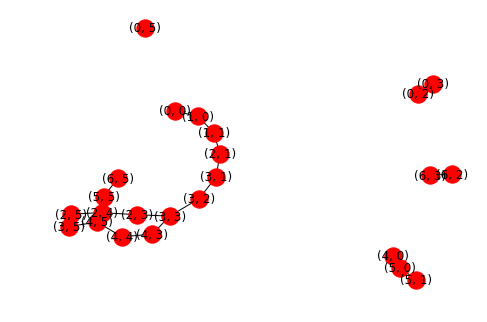

In [2]:
#Header Information

def maze(MazeMatrix,start,finish):
    #MazeMatrix is a binary matrix (2D list of lists)
    #start & finish are tuples containing the starting and finishing point indices e.g. (1,1) & (5,5)
    
    #import statements, function body
    import networkx as nx
    import matplotlib.pyplot as plt
    
    def MazeMatrix2Graph(MazeMatrix):
        #MazeMatrix is a binary matrix (2D list of lists)
        #function body
        nodes = {}
        vertices = []
        MazeGraph = nx.Graph()
        
        rows = len(MazeMatrix)
        if rows != 0: cols = len(MazeMatrix[0])
        
        for i in range(rows):
            for j in range(cols):
                if MazeMatrix[i][j] == 1:
                    MazeGraph.add_node((i,j))
                    
                    if (i+1 < rows) and MazeMatrix[i+1][j]==1:
                            MazeGraph.add_edge((i,j),(i+1,j))
                    if (j+1 < cols) and MazeMatrix[i][j+1]==1:
                            MazeGraph.add_edge((i,j),(i,j+1))
                    if (i-1 >= 0) and MazeMatrix[i-1][j]==1:
                        MazeGraph.add_edge((i,j),(i-1,j))
                    if (j-1 >= 0) and MazeMatrix[i][j-1]==1:
                            MazeGraph.add_edge((i,j),(i,j-1))
        
        nx.draw(MazeGraph, with_labels=True)
        return MazeGraph #a networkx graph whose nodes represent the '1's in the input matrix. node labels are tuples.
    
    def MazeAnswerBFS(MazeGraph,start,finish):
        #MazeGraph is a networkx graph 
        #start and finish are tuples containing the starting and finishing point indices

        #function body 
        components = MazeComponentsDFS(MazeGraph)

        tree = None

        for i in components:
            if start and finish in i: tree = i

        if tree == None:
            return []

        path = {}
        for i in tree:
            path[i] = []

        todolist = [start]
        visited = []
        while todolist:
            n = todolist[0]
            for i in MazeGraph.neighbors(n):
                if (i not in todolist) and (i not in visited): 
                    todolist.append(i)
                    path[i] = path[n] + [n]
                    if i == finish:
                        path[i] += [i]
                        break                    
            todolist.remove(n)
            visited.append(n)

        shortest_path = path[finish]

        return shortest_path #list of tuples containing indices of the points in the answer
    
    def MazeComponentsDFS(MazeGraph):
        #MazeGraph is a networkx graph
        
        #function body  
        lst = []
        nodes = nx.nodes(MazeGraph)
        components = []
        for i in nodes:
            if i not in lst:
                ccomp = []
                todolist = [i]
                visited = []
                while todolist:
                    n = todolist[0]
                    for j in MazeGraph.neighbors(n):
                        if (j not in todolist) and (j not in visited): 
                            todolist.insert(0, j)
                    visited.append(n)
                    todolist.remove(n)
                    lst.append(n)
                ccomp.extend(visited)
            if ccomp not in components: 
                components.append(ccomp)

        return components #list of lists, each containing tuples of the indices of points in that component
    
    #function body
    MazeGraph = MazeMatrix2Graph(MazeMatrix)
    a = MazeAnswerBFS(MazeGraph, start, finish)
    b = MazeComponentsDFS(MazeGraph)
    print(a)
    print('\n')
    print(b)
#   a is the output of MazeAnswerBFS and b is the output of MazeComponentsDFS

#DO NOT MODIFY THE FOLLOWING
hw3bmaze=   [[1,0,1,1,0,1],
[1,1,0,0,0,0],
[0,1,0,1,1,1],
[0,1,1,1,0,1],
[1,0,0,1,1,1],
[1,1,0,0,0,1],
[0,0,1,1,0,1]]

hw3bstart=(0,0)
hw3bfinish=(6,5)
maze(hw3bmaze,hw3bstart,hw3bfinish)
    
#output for this example should be:
#[(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5)]
#[[(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5), (3, 5), (2, 5), (2, 4), (2, 3)], [(0, 2), (0, 3)], [(0, 5)], [(4, 0), (5, 0), (5, 1)], [(6, 2), (6, 3)]]


In [51]:
m = [[1,0,1,1,0,1],
[1,1,0,0,0,0],
[0,1,0,1,1,1],
[0,1,1,1,0,1],
[1,0,0,1,1,1],
[1,1,0,0,0,1],
[0,0,1,1,0,1]]

for i in m:
    print (i)

[1, 0, 1, 1, 0, 1]
[1, 1, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 1]
[0, 1, 1, 1, 0, 1]
[1, 0, 0, 1, 1, 1]
[1, 1, 0, 0, 0, 1]
[0, 0, 1, 1, 0, 1]


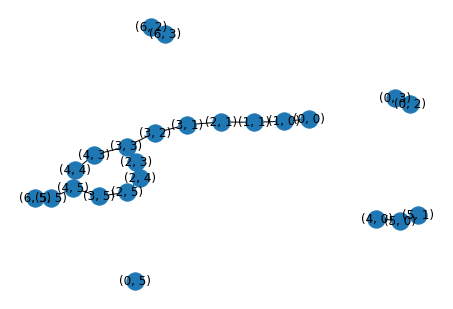

In [99]:
nx.draw(MazeGraph, with_labels=True)

In [100]:
MazeGraph.neighbors((0, 0))

In [105]:
def MazeComponentsDFS(MazeGraph):
    lst = []
    nodes = nx.nodes(MazeGraph)
    
    components = []
    for i in nodes:
        if i not in lst:
            ccomp = []
            todolist = [i]
            visited = []
            while todolist:
                n = todolist[0]
                for j in MazeGraph.neighbors(n):
                    if (j not in todolist) and (j not in visited): 
                        todolist.insert(0, j)
                visited.append(n)
                todolist.remove(n)
                lst.append(n)
            ccomp.extend(visited)
        if ccomp not in components: 
            components.append(ccomp)  
            
    return components
    
print (MazeComponentsDFS(MazeGraph))

[[(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5), (3, 5), (2, 5), (2, 4), (2, 3)], [(0, 2), (0, 3)], [(0, 5)], [(4, 0), (5, 0), (5, 1)], [(6, 2), (6, 3)]]


In [125]:
def MazeAnswerBFS(MazeGraph,start,finish):
    #MazeGraph is a networkx graph 
    #start and finish are tuples containing the starting and finishing point indices

    #function body 
    components = MazeComponentsDFS(MazeGraph)
    
    tree = None
    
    for i in components:
        if start and finish in i: tree = i

    if tree == None:
        return []
    
    path = {}
    for i in tree:
        path[i] = []
    
    todolist = [start]
    visited = []
    while todolist:
        n = todolist[0]
        for i in MazeGraph.neighbors(n):
            if (i not in todolist) and (i not in visited): 
                todolist.append(i)
                path[i] = path[n] + [n]
                if i == finish:
                    path[i] += [i]
                    break                    
        todolist.remove(n)
        visited.append(n)

    shortest_path = path[finish]
    
    return shortest_path #list of tuples containing indices of the points in the answer

MazeAnswerBFS(MazeGraph, (0,0), (6,5))

[(0, 0),
 (1, 0),
 (1, 1),
 (2, 1),
 (3, 1),
 (3, 2),
 (3, 3),
 (4, 3),
 (4, 4),
 (4, 5),
 (5, 5),
 (6, 5)]

In [84]:
a = [[(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5), (3, 5), (2, 5), (2, 4), (2, 3)], [(0, 2), (0, 3)], [(0, 5)], [(4, 0), (5, 0), (5, 1)], [(6, 2), (6, 3)]]
b = [[(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5), (3, 5), (2, 5), (2, 4), (2, 3)], [(0, 2), (0, 3)], [(0, 5)], [(4, 0), (5, 0), (5, 1)], [(6, 2), (6, 3)]]

a == b

True